In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Formatting images

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import os
from PIL import Image

# Function to load, resize, and flatten images
def load_and_preprocess_images(folder_path, target_size=(224, 224)):
    images = []
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpeg')]

    for filename in image_files:
        img_path = os.path.join(folder_path, filename)
        try:
          with Image.open(img_path) as img:
            # Convert image to grayscale
                img = img.convert('L')
                img = img.resize(target_size)
                img_array = np.array(img)
                # Flatten the image
                img_array = img_array.flatten()
                images.append(img_array)
        except Exception as e:
          print(f"Error processing image {filename}: {e}")
    return images

#neg_train_img = load_and_preprocess_images('/content/drive/MyDrive/zoidberg/chest_Xray/train/NORMAL')
#pos_train_img = load_and_preprocess_images('/content/drive/MyDrive/zoidberg/chest_Xray/train/PNEUMONIA')

In [ ]:
X_train = np.vstack([neg_train_img, pos_train_img])
y_train = np.hstack([np.zeros(len(neg_train_img)), np.ones(len(pos_train_img))])

In [ ]:
neg_test_img = load_and_preprocess_images('/content/drive/MyDrive/zoidberg/chest_Xray/test/NORMAL')
pos_test_img = load_and_preprocess_images('/content/drive/MyDrive/zoidberg/chest_Xray/test/PNEUMONIA')

In [ ]:
X_test = np.vstack([neg_test_img, pos_test_img])
y_test = np.hstack([np.zeros(len(neg_test_img)), np.ones(len(pos_test_img))])

In [ ]:
logisticRegr = LogisticRegression(max_iter=600, C=0.1)

logisticRegr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1, max_iter=600)

In [ ]:
# Evaluate the model
train_accuracy = accuracy_score(y_train, logisticRegr.predict(X_train))
test_accuracy = accuracy_score(y_test, logisticRegr.predict(X_test))

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 1.0
Testing Accuracy: 0.7467948717948718


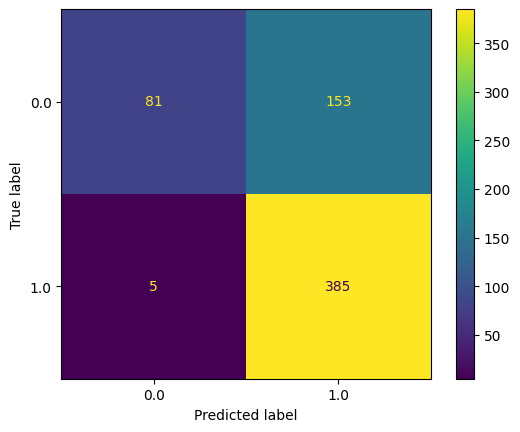

In [ ]:
predictions = logisticRegr.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=logisticRegr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=logisticRegr.classes_)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import recall_score, precision_score

In [ ]:
recall_score(y_test, predictions)

0.9871794871794872

In [ ]:
precision_score(y_test, predictions)

0.7156133828996283

In [ ]:
len(X_train)

5216

In [ ]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


# Grid search hyperparameter optimization

In [ ]:
param_grid = {
    'C': [0.1, 0.01],   # Regularization strength
    'solver': ['lbfgs'],
    'max_iter': [300, 600]
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

# Evaluate the model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy}")

results = grid_search.cv_results_

# Extract parameters and mean test scores
param_C = results['param_C']
param_solver = results['param_solver']
param_max_iter = results['param_max_iter']
mean_test_score = results['mean_test_score']

plt.figure(figsize=(12, 6))
for solver in np.unique(param_solver):
    for max_iter in np.unique(param_max_iter):
        mask = (param_solver == solver) & (param_max_iter == max_iter)
        plt.plot(param_C[mask], mean_test_score[mask], label=f'solver={solver}, max_iter={max_iter}')

plt.xscale('log')
plt.xlabel('C (Regularization strength)')
plt.ylabel('Mean cross-validated accuracy')
plt.title('Hyperparameter Tuning of Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

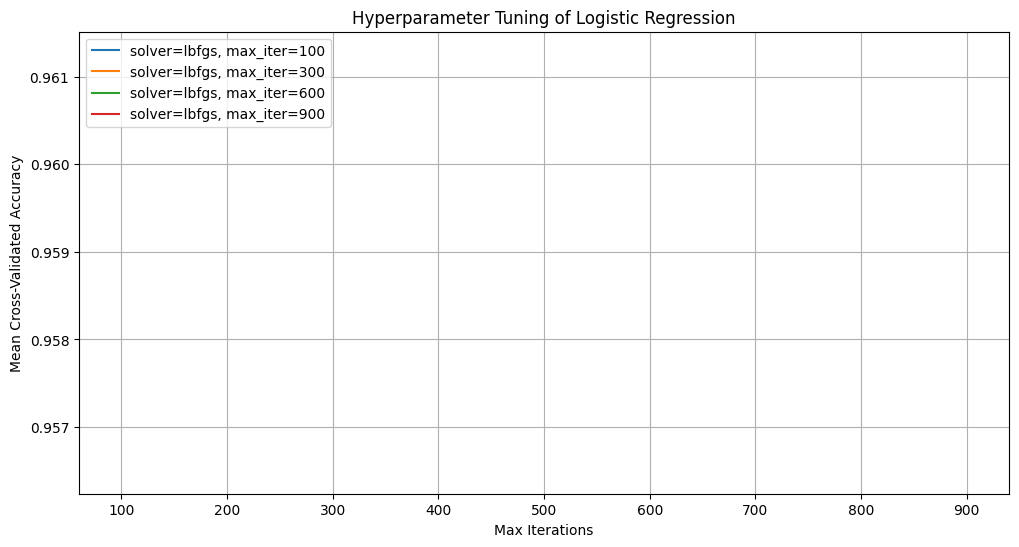

In [ ]:
plt.figure(figsize=(12, 6))
for solver in np.unique(param_solver):
    for max_iter in np.unique(param_max_iter):
        mask = (param_solver == solver) & (param_max_iter == max_iter)
        plt.plot(param_max_iter[mask], mean_test_score[mask], label=f'solver={solver}, max_iter={max_iter}')

plt.xlabel('Max Iterations')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.title('Hyperparameter Tuning of Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()


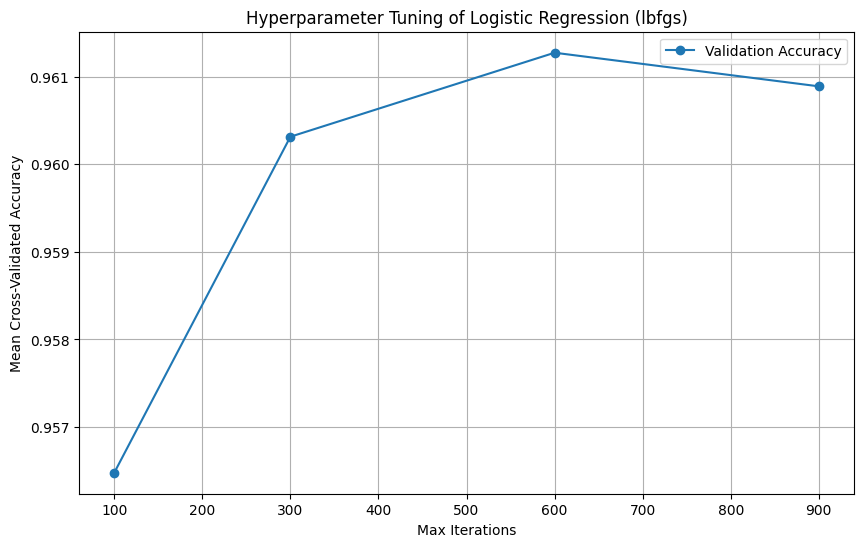

In [ ]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(param_max_iter, mean_test_score, marker='o', label='Validation Accuracy')
plt.xlabel('Max Iterations')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.title('Hyperparameter Tuning of Logistic Regression (lbfgs)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
for solver in np.unique(param_solver):
    for max_iter in np.unique(param_max_iter):
        mask = (param_solver == solver) & (param_max_iter == max_iter)
        print(param_C[mask], mean_test_score[mask], f'solver={solver}, max_iter={max_iter}')

[0.1] [0.95647943] solver=lbfgs, max_iter=100
[0.1] [0.96031342] solver=lbfgs, max_iter=300
[0.1] [0.96127201] solver=lbfgs, max_iter=600
[0.1] [0.9608885] solver=lbfgs, max_iter=900


In [ ]:
model = LogisticRegression(C=0.1, warm_start=True)
num_iterations = 500
val_accuracies = []
val_recalls = []

for i in range(num_iterations):
    model.fit(X_train, y_train)

    # Calculate accuracy and recall on validation set
    y_val_pred = model.predict(X_test)
    val_accuracy = accuracy_score(y_test, y_val_pred)
    val_recall = recall_score(y_test, y_val_pred)
    val_accuracies.append(val_accuracy)
    val_recalls.append(val_recall)

    # Update the max_iter to continue training
    model.max_iter += 1

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

KeyboardInterrupt: 

In [ ]:
# Plot training and validation accuracy over iterations
plt.figure(figsize=(12, 6))
# plt.plot(range(1, num_iterations + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, num_iterations + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Iterations')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation recall over iterations
plt.figure(figsize=(12, 6))
# plt.plot(range(1, num_iterations + 1), train_recalls, label='Training Recall')
plt.plot(range(1, num_iterations + 1), val_recalls, label='Validation Recall')
plt.xlabel('Iterations')
plt.ylabel('Recall')
plt.title('Training and Validation Recall over Iterations')
plt.legend()
plt.grid(True)
plt.show()

#Save and load binary images

In [ ]:
import pickle

In [ ]:
file = open('/content/drive/MyDrive/zoidberg/binary_images/test_labels.pkl', 'wb')

# dump information to that file
pickle.dump(y_test, file)

In [ ]:
def get_img_pp(imgs=['train', 'train_labels', 'test', 'test_labels']):
  res = []
  for img in imgs:
    print(img)
    file = open(f'/content/drive/MyDrive/zoidberg/binary_images/{img}.pkl', 'rb')

    # dump information to that file
    res.append(pickle.load(file))

    # close the file
    file.close()

  return res

imgs = get_img_pp(imgs=['train', 'train_labels'])

train
train_labels


In [ ]:
X_train = imgs[0]
y_train = imgs[1]

In [ ]:
file = open('/content/drive/MyDrive/zoidberg/models/logistic_reg(n_iter=600,C=0.1).pkl', 'wb')

# dump information to that file
pickle.dump(logisticRegr, file)